In [3]:
# Two layers antireflection coatings with air as incident medium on BK7 glass substrate
# (Thin Film Optical Filters 2018, Figure 4.15).

In [1]:
# Load modules
include("TMMOptics.jl")
include("RIdb.jl")
include("MixingRules.jl")
include("nplot.jl")
using Main.TMMOptics
using Main.RIdb: air, dummy, bk7
using PyPlot

In [2]:
# Define beam
λi = 400 # intial wavelength [nm]
λf = 700 # final wavelength [nm]
λ = LinRange(λi, λf, λf-λi+1) # wavelength range [nm]
# λ = λi:λf
λ0 = 509.8 # reference wavelength
θ = [0.] # angle of incidence [degrees]
p = 0. # polatization (s-wave = 0. and p-wave = 1., or any intermediate)
beam = PlaneWave(λ, λ0, θ, p);

In [3]:
# Define type of layers with their indexes of refraction and thicknesses
l0 = Geometrical(air(beam.λ), 0.) # air
l1 = Optical(dummy(beam.λ, 1.38, 0.), 1/4.)
l2 = Optical(dummy(beam.λ, 2.15, 0.), 1/2.) # Ta2O5
l3 = Optical(dummy(beam.λ, 1.9, 0.), 1/2.) # Y2O3
l4 = Geometrical(bk7(beam.λ), 0.); # substrate BK7 glass

In [4]:
# Sequence of materials: elements represent the index position below in the structure (surface down to substrate)
nseq1 = [l0 l1 l2 l4];
nseq2 = [l0 l1 l3 l4];

In [5]:
# Perform computation
results1 = thinfilmoptics(beam, nseq1);
results2 = thinfilmoptics(beam, nseq2);

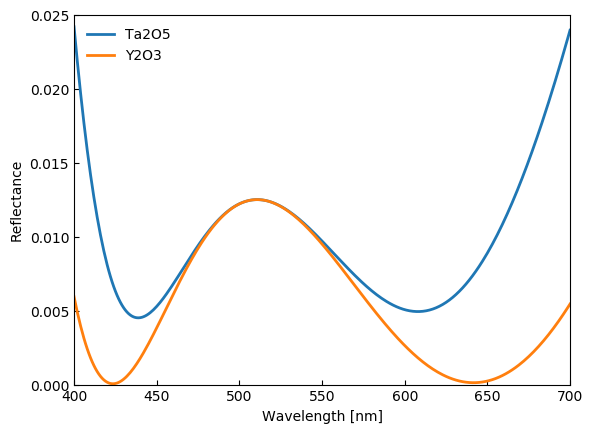

(0.0, 0.025)

In [7]:
# plot the R, T and A spectra
plot(λ, results1.Spectra.R, label="Ta2O5")
plot(λ, results2.Spectra.R, label="Y2O3")
legend(loc="best")
xlabel("Wavelength [nm]")
ylabel("Reflectance")
xlim(λi,λf)
ylim(0.,0.025)

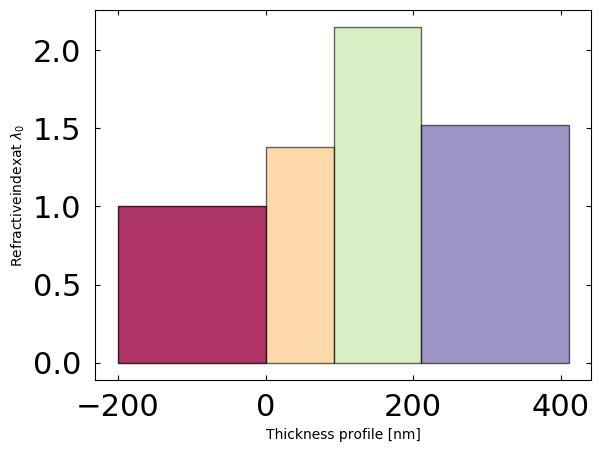

In [9]:
# plot the refractive index profile
nplot(beam.λ, beam.θ, beam.λ0, results1.Misc.d, results1.Misc.ℓ, results1.Field.emf, results1.Misc.nλ0, nseq1)

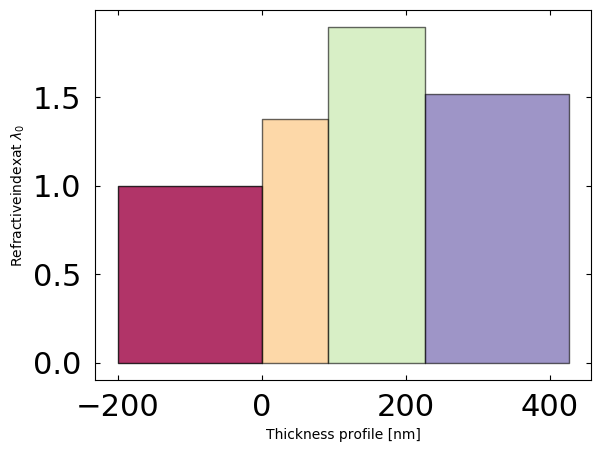

In [10]:
# plot the refractive index profile
nplot(beam.λ, beam.θ, beam.λ0, results2.Misc.d, results2.Misc.ℓ, results2.Field.emf, results2.Misc.nλ0, nseq2)

In [ ]:
# Notice in the profiles that the first and last media do not have any thickness, but were assigned 200 nm for
# the plotting purpose.